<a href="https://colab.research.google.com/github/AyonRabbani/ReinforcementLearning/blob/master/Formula1-Team-Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import * 

In [2]:
path = Path("Data/"); path.ls()

[PosixPath('Data/redbull.csv'),
 PosixPath('Data/ferrari.csv'),
 PosixPath('Data/racingpoint.csv'),
 PosixPath('Data/mercedes.csv'),
 PosixPath('Data/mclaren.csv')]

In [10]:
for file, folder in [('ferrari.csv', "Ferrari"), ('mclaren.csv', 'Mclaren'), ('mercedes.csv', 'Mercedes'),
                    ('racingpoint.csv', 'RacingPoint'), ('redbull.csv', 'Redbull') ]:
  dest = path/folder 
  dest.mkdir(parents = True, exist_ok = True)
  download_images(path/file, dest, max_pics = 200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [11]:
for folder in ('Ferrari', 'Mclaren', 'Mercedes', 'RacingPoint', 'Redbull'): 
  print(folder)
  verify_images(path/folder, delete=True, max_size = 200)

Ferrari


Mclaren


Mercedes


RacingPoint


Redbull


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.3, 
                                  ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

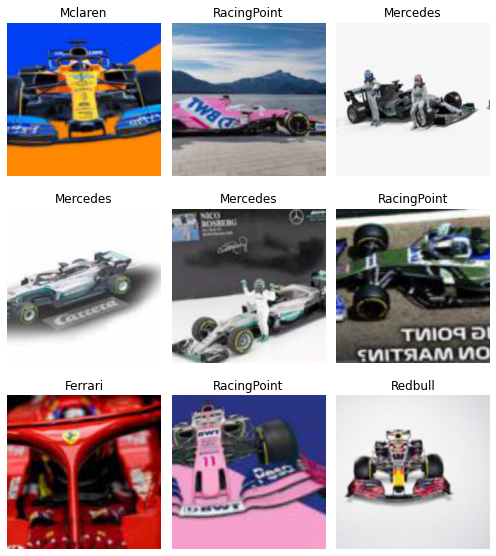

In [13]:
data.show_batch(3, figsize=(7,8))

In [14]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.779009,2.254453,0.733333,00:04
1,2.272440,1.316347,0.508333,00:04
2,1.823477,0.797487,0.291667,00:04
3,1.493146,0.745585,0.233333,00:04
4,1.261526,0.781175,0.241667,00:04
5,1.080713,0.747115,0.216667,00:04
6,0.934316,0.740480,0.216667,00:04
7,0.824206,0.736587,0.208333,00:04
8,0.741521,0.739586,0.183333,00:04
9,0.683991,0.735864,0.200000,00:04


In [0]:
learn.save('stage-1')

In [16]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


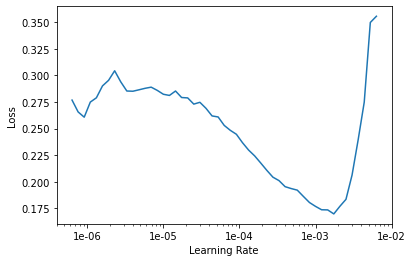

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(4, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.256335,0.667122,0.166667,00:04
1,0.232060,0.676404,0.141667,00:04
2,0.220099,0.645850,0.141667,00:04
3,0.193186,0.626849,0.166667,00:04


In [19]:
interp = ClassificationInterpretation.from_learner(learn)

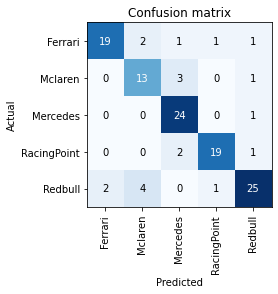

In [20]:
interp.plot_confusion_matrix()

In [21]:
learner_two = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [22]:
learner_two.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.245046,1.702470,0.458333,00:06
1,1.466047,1.079537,0.266667,00:04
2,1.084204,1.067024,0.250000,00:04
3,0.902530,0.999782,0.233333,00:04


In [23]:
learner_two.unfreeze()
learner_two.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


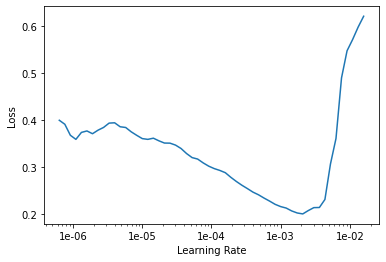

In [24]:
learner_two.recorder.plot()

In [28]:
learner_two.fit_one_cycle(3, max_lr=0.0001)

epoch,train_loss,valid_loss,error_rate,time
0,0.427381,0.442299,0.133333,00:05
1,0.412798,0.374936,0.116667,00:05
2,0.391810,0.377172,0.116667,00:05


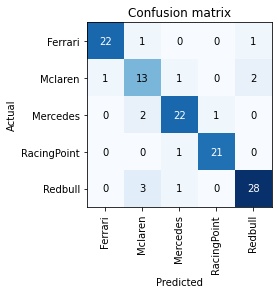

In [29]:
interp_two = ClassificationInterpretation.from_learner(learner_two)
interp_two.plot_confusion_matrix()